In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import open3d as o3d

In [7]:
print(np.amin(depth_vals))

0.0


['zgt']
(1536, 2048)


<Figure size 640x480 with 0 Axes>

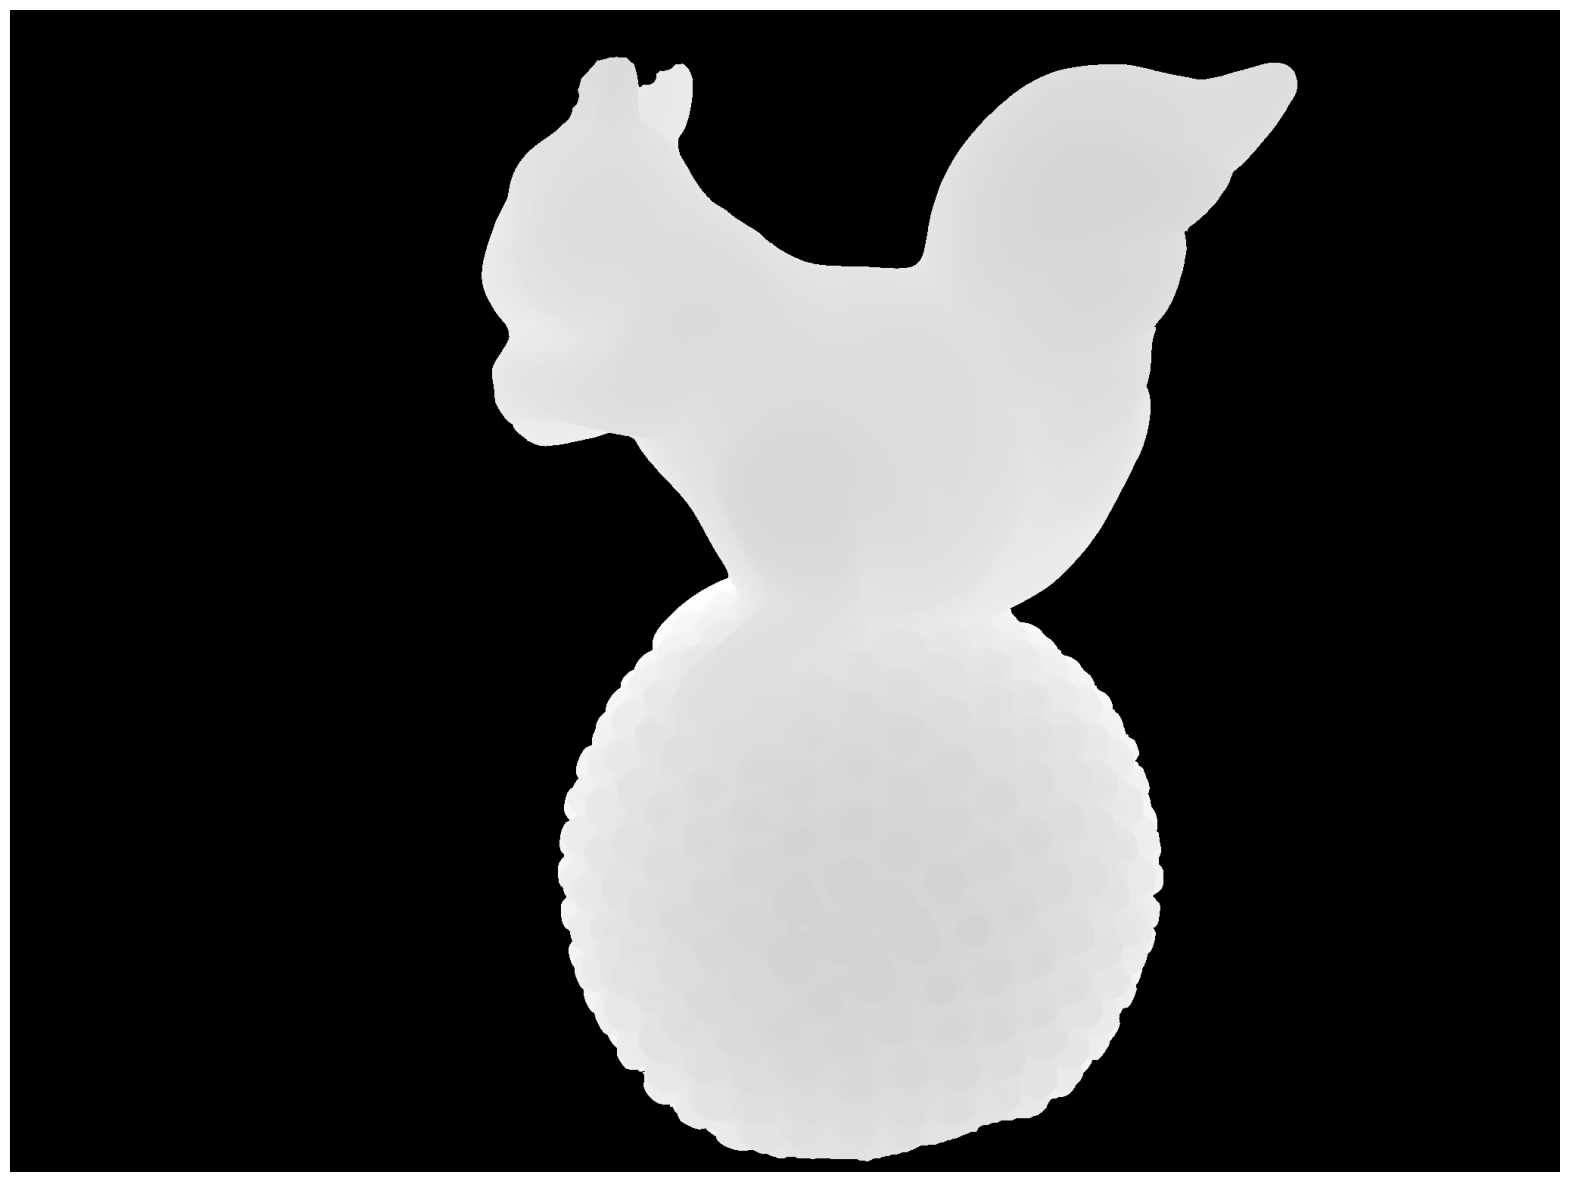

In [9]:
#read ground truth depth

object = r"Squirrel"

gt_depth_path = r"../datasets/LUCES_dataset/data/" + object + r"/zgt.npz"

depth_vals = np.load(gt_depth_path)
print(depth_vals.files)

depth_vals = depth_vals['zgt']
print(depth_vals.shape)

plt.figure(1)
plt.figure(figsize=(20,20))
plt.imshow(depth_vals, cmap='gray')
plt.axis("off")
plt.savefig(r"./report_results/gt_depth_" + object + r".jpg", bbox_inches='tight', pad_inches=0.0, dpi=100)


In [3]:
#read ply file


input_file = r"./results/images/Bell/int_depth_mesh_b0.ply"
pcd = o3d.io.read_point_cloud(input_file) # Read the point cloud

# Visualize the point cloud within open3d
# o3d.visualization.draw_geometries([pcd]) 

# Convert open3d format to numpy array
# Here, you have the point cloud in numpy format. 
point_cloud_in_numpy = np.asarray(pcd.points)

print(point_cloud_in_numpy.shape)

(143985, 3)


In [17]:
#resize images

src_path = r"../datasets/my_data_low_res/dog/mask.png"
# dest_path = src_path[:-1] + r"_resized/"

RESIZE_FACTOR = 2

image = cv2.imread(os.path.join(src_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, _ = image.shape
image_resized = cv2.resize(image, (width // RESIZE_FACTOR, height // RESIZE_FACTOR), interpolation= cv2.INTER_AREA)
# image_resized = image

im = Image.fromarray(image_resized)
im.save(os.path.join(src_path))

In [14]:
#resize images

src_path = r"../datasets/my_data_low_res/shoe/admissible/"
# dest_path = src_path[:-1] + r"_resized/"

dest_path = src_path

print(src_path)
print(dest_path)

RESIZE_FACTOR = 2

for image_path in tqdm(os.listdir(src_path)):
    if(image_path == r".DS_Store"):
        continue
    image = cv2.imread(os.path.join(src_path, image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    height, width, _ = image.shape
    image_resized = cv2.resize(image, (width // RESIZE_FACTOR, height // RESIZE_FACTOR), interpolation= cv2.INTER_AREA)
    # image_resized = image

    im = Image.fromarray(image_resized)
    # print(os.path.join(dest_path, image_path[:-4] + r".jpg"))
    im.save(os.path.join(dest_path, image_path[:-4] + r".jpg"))

    # plt.imshow(image_resized)
 

../datasets/my_data_low_res/shoe/admissible/
../datasets/my_data_low_res/shoe/admissible/


100%|██████████| 12/12 [00:01<00:00,  9.91it/s]
